In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [259]:
df= pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [260]:
df.shape

(30, 17)

In [261]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [262]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [264]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


W         AxesSubplot(0.125,0.536818;0.0731132x0.343182)
R      AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
AB     AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
H      AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
2B     AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
3B     AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
HR     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
BB     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
SO     AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
SB           AxesSubplot(0.125,0.125;0.0731132x0.343182)
RA        AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ER        AxesSubplot(0.300472,0.125;0.0731132x0.343182)
ERA       AxesSubplot(0.388208,0.125;0.0731132x0.343182)
CG        AxesSubplot(0.475943,0.125;0.0731132x0.343182)
SHO       AxesSubplot(0.563679,0.125;0.0731132x0.343182)
SV        AxesSubplot(0.651415,0.125;0.0731132x0.343182)
E         AxesSubplot(0.739151,0.125;0.0731132x0.343182)
dtype: object

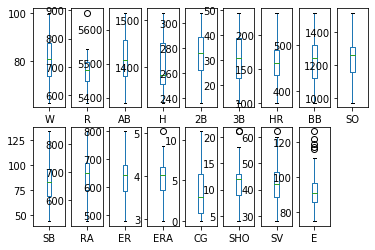

In [265]:
 df.plot(kind='box',subplots=True,layout=(2,9))

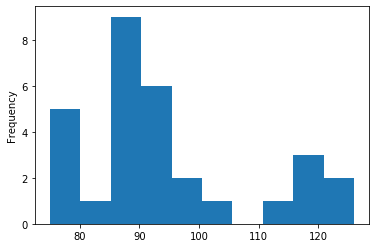

In [266]:
df['E'].plot.hist()

In [267]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [268]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [269]:
df_new = df[(z<3).all(axis=1)]

In [270]:
df_new.shape

(29, 17)

In [271]:
df.shape

(30, 17)

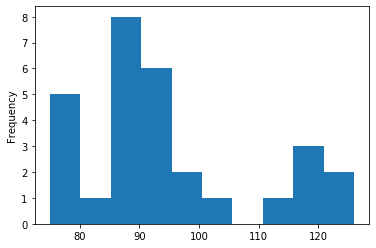

In [272]:
df_new['E'].plot.hist()

W         AxesSubplot(0.125,0.536818;0.0731132x0.343182)
R      AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
AB     AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
H      AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
2B     AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
3B     AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
HR     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
BB     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
SO     AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
SB           AxesSubplot(0.125,0.125;0.0731132x0.343182)
RA        AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ER        AxesSubplot(0.300472,0.125;0.0731132x0.343182)
ERA       AxesSubplot(0.388208,0.125;0.0731132x0.343182)
CG        AxesSubplot(0.475943,0.125;0.0731132x0.343182)
SHO       AxesSubplot(0.563679,0.125;0.0731132x0.343182)
SV        AxesSubplot(0.651415,0.125;0.0731132x0.343182)
E         AxesSubplot(0.739151,0.125;0.0731132x0.343182)
dtype: object

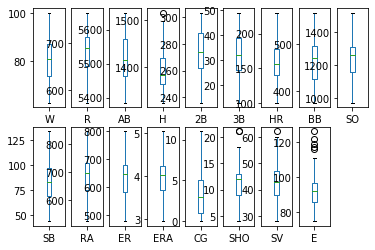

In [273]:
df_new.plot(kind='box',subplots=True,layout=(2,9))

In [274]:
df=df_new

In [275]:
df.shape

(29, 17)

<Figure size 0x1224 with 0 Axes>

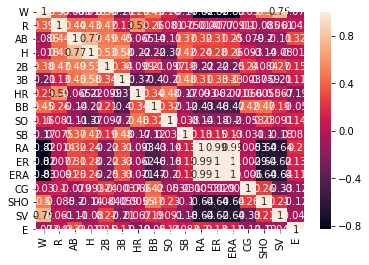

<Figure size 0x1224 with 0 Axes>

In [276]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(0,17))

In [277]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


In [278]:
df=df.drop(columns=['RA','ER','ERA'], axis=1)

In [279]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


In [280]:
x= df.drop(['W'], axis=1)
y= df['W']

In [281]:
x.shape

(29, 13)

In [282]:
y.shape

(29,)

In [317]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33, random_state=51)

In [318]:
x_train.shape

(19, 13)

In [319]:
y_test.shape

(10,)

In [320]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [321]:
y_pred= lr.predict(x_test)

In [322]:
y_pred

array([90.77145834, 78.65158645, 82.02876214, 77.75500025, 94.18829403,
       82.85516953, 68.65439939, 71.83721361, 86.92127333, 67.05467223])

In [323]:
y_test

16    98
9     78
2     81
23    67
8     80
27    79
19    64
18    68
1     83
14    68
Name: W, dtype: int64

In [324]:
lr.coef_

array([ 1.21334073e-01, -3.97659657e-03, -4.75998082e-02, -2.16243435e-02,
       -1.00256731e-01, -9.68436876e-02, -1.00127630e-02,  3.06637894e-04,
        5.39248215e-02,  6.88446345e-01,  6.60115847e-01,  1.04453741e+00,
       -8.78101738e-02])

In [325]:
lr.intercept_


65.41629129740167

In [326]:
lr.score(x_train,y_train)

0.9579367231720052

In [327]:
mse= mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [328]:
mse

43.823245226662706

In [329]:
mae

5.106556818344933

In [330]:
R_score= r2_score(y_test,y_pred)

In [331]:
R_score

0.5320029343585786